# Round Valley TimML Model
## Import Libraries

In [1]:
from timml import *
from pylab import *
%matplotlib notebook

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as tick

import scipy.stats as sp
import statsmodels.api as sm

from pylab import rcParams
import platform
rcParams['figure.figsize'] = 15, 10

import re
import os
import sys
import glob

from scipy.optimize import minimize
from scipy.optimize import differential_evolution

import datetime
import spotpy

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Define Areas, Wells, and Streams

In [3]:
#Input Data

# Inhomogeneity
xy1 = [(458709, 4469789), (458395, 4469322), (463199, 4463683), (465009, 4460816), 
       (471900, 4461805), (471632, 4466700), (469818, 4469867), (463873, 4476301), 
       (461306, 4476438), (460603, 4474284), (462911, 4473605), (463008, 4472810), 
       (463214, 4472338), (463948, 4471029), (464513, 4470407), (465596, 4470066), 
       (468762, 4466246), (468601, 4465665), (468056, 4464703), (467333, 4465471), 
       (466592, 4466971), (465792, 4468197), (465515, 4467838), (466029, 4466414), 
       (464872, 4465778), (464696, 4466859), (463977, 4467688), (463197, 4469667), 
       (462740, 4470114), (461568, 4470218), (460674, 4471192), (460145, 4471795), 
       (459112, 4472032), (459008, 4471886), (459262, 4471288)] 

# Recharge Zones
sinkdata = {1:[1272, 463392, 4465768, 0.0004],
            2:[1402, 468189, 4469368, 0.0004], 
            3:[1217, 469770, 4467257, 0.0004], 
            4:[1696, 469922, 4464032, 0.0004], 
            5:[2186, 465968, 4463405, 0.0004], 
            6:[1746, 461646, 4468330, 0.0004], 
            7:[1581, 465040, 4472533, 0.0004], 
            8:[510, 466467, 4468147, 0.0002], 
            9:[535, 467136, 4467230, 0.0002], 
            10:[543, 465309, 4466709, 0.0001], 
            11:[612, 467825, 4466165, 0.0001], 
            12:[1233, 464816, 4469001, 0.0001], 
            13:[612, 463525, 4470398, 0.0002], 
            14:[1029, 462258, 4471556, 0.0002], 
            15:[1121, 460574, 4473056, 0.0002]}

# Pumping Wells
welldata = {434898:[466397,4467342, 30,2],433360:[466194,4469366, 30,2],
            433315:[466759,4469267, 30,2],432783:[466401,4468741, 30,2],
            432752:[463360,4471236, 30,1],432725:[462993,4472715, 30,2],
            431954:[462286,4470991, 30,2],431640:[456638,4473258, 30,2],
            431345:[457252,4472953, 30,2],431239:[465991,4470340, 30,2],
            430866:[462368,4472921, 30,2],430684:[465571,4469848, 30,2],
            430637:[457459,4472961, 30,2],428812:[465196,4468122, 300,1],
            427367:[466311,4468808, 30,1],427366:[460582,4472951, 30,1],
            427134:[467457,4466223, 100,1],427132:[465579,4468072, 30,1],
            427131:[465828,4469408, 30,1],427130:[465642,4469518, 30,1],
            426924:[460977,4473020, 30,1],426923:[461127,4472978, 30,1],
            123533:[460678,4473119, 30,1],35570:[457843,4472956, 30,2],
            35541:[463481,4469391, 30,1],35515:[464594,4472692, 30,2],
            35512:[466732,4468200, 30,1],35508:[465689,4469321, 30,1],
            35415:[465604,4468698, 30,1],34824:[465606,4468466, 30,1],
            34800:[465351,4469238, 30,1],34159:[465464,4467809, 30,2],
            34001:[465541,4469921, 30,1],34000:[456845,4473334, 30,2],
            33999:[459904,4472933, 30,1],33944:[463926,4469594, 30,1],
            33826:[464752,4469259, 30,1],33755:[465606,4468804, 30,2],
            33739:[466355,4468074, 50,2],33624:[462954,4470584, 30,2],
            33605:[460437,4473081, 30,1],33420:[465451,4469855, 30,1],
            33329:[465383,4468695, 30,1],33327:[465277,4468886, 30,2],
            33278:[465801,4468114, 30,1],33269:[466491,4468326, 30,2],
            32957:[465985,4468302, 30,1],32791:[463926,4471034, 30,1],
            32708:[466736,4469267, 30,2],32616:[466331,4469472, 30,1],
            32484:[462491,4472639, 30,1],32412:[460838,4473179, 30,1],
            32086:[465562,4469833, 30,1],31980:[465372,4468811, 30,2],
            31838:[456642,4473268, 30,2],31635:[465805,4470925, 30,2],
            31634:[466046,4470281, 30,2],31511:[465961,4469205, 30,1],
            31510:[465629,4468940, 30,1],31509:[465290,4468825, 30,2],
            31482:[464392,4471139, 30,1],31330:[465179,4471899, 30,1],
            31149:[465283,4469542, 30,2],31148:[465314,4469515, 30,2],
            31027:[464334,4470678, 30,1],30961:[464864,4469308, 30,1],
            30721:[462794,4473643, 30,2],30720:[461681,4473278, 30,1],
            30676:[465262,4469968, 30,1],30270:[466420,4468880, 30,2],
            30103:[463640,4469250, 30,1],29919:[466160,4468619, 3000,2],
            27919:[465103,4468911, 30,2],27590:[465866,4468218, 30,2],
            26467:[460882,4472747, 1000,2],26265:[465985,4468302, 30,2],
            25711:[465629,4469982, 30,2],25616:[457586,4472972, 30,2],
            25438:[463052,4472094, 30,2],25113:[462432,4472509, 30,1],
            25112:[462726,4472433, 30,2],24960:[466206,4470672, 30,2],
            24831:[465692,4469918, 30,2],24771:[461957,4471108, 30,1],
            23683:[463294,4469675, 30,2],22738:[463386,4471854, 30,2],
            21320:[462549,4470835, 30,2],21141:[463228,4471956, 30,2],
            21089:[466454,4470764, 30,2],19592:[466154,4468345, 30,2],
            18977:[465088,4468839, 30,2],18629:[466234,4468363, 30,2],
            17119:[458386,4474498, 30,2],17116:[466712,4468309, 30,2],
            16757:[463467,4469098, 30,1],16643:[460824,4473184, 30,1],
            16571:[466292,4468452, 30,2],16559:[457170,4473248, 30,2],
            16214:[465750,4467056, 30,2],16173:[463983,4469559, 0,2],
            16065:[467609,4466703, 30,1],15973:[467557,4466837, 30,1],
            15964:[465517,4467708, 30,2],15954:[462100,4471190, 30,2],
            15816:[464209,4471367, 30,2],15815:[463248,4471427, 30,2],
            14537:[467551,4466970, 30,1],14476:[460448,4473120, 30,1],
            14422:[462663,4472746, 30,1],13759:[464300,4470285, 3000,2],
            13120:[465678,4468384, 30,2],12418:[459745,4472845, 30,1],
            11791:[462679,4472616, 30,1],11762:[465616,4467466, 30,2],
            11281:[466535,4467713, 30,1],11226:[465623,4469760, 30,2],
            11100:[465961,4469840, 30,2],11036:[466852,4470036, 30,2],
            10974:[466870,4467961, 30,2],10963:[466491,4470442, 30,2],
            10803:[466694,4469591, 30,2],10751:[464353,4470396, 30,2],
            10105:[465247,4467982, 300,1],10097:[464382,4469025, 0,2],
            9841:[465856,4468478, 30,2],9819:[465776,4467399, 30,2],
            9724:[467081,4467508, 30,1],9708:[466283,4471916, 30,2],9229:[466000,4469563, 30,2],
            9084:[465671,4467024, 30,1],8815:[463132,4471849, 1000,2],8814:[465404,4470242, 30,2],
            8708:[465470,4469615, 30,1],7846:[461811,4472603, 1000,1],7652:[463188,4469855, 30,2],
            7639:[466428,4468626, 30,2],7008:[465602,4466526, 50,2],6923:[463843,4469401, 30,2],
            6911:[467228,4467483, 30,1],6857:[467149,4467454, 30,1],6503:[462826,4472793, 30,1],
            6501:[462909,4472741, 30,1],5858:[465456,4468714, 30,1],5547:[465436,4469845, 30,1],
            5530:[465801,4470378, 30,1],5512:[465553,4469704, 30,1],4143:[465391,4467687, 30,2],
            3400:[464199,4469813, 30,2],3041:[464923,4469165, 30,2],2851:[465136,4469771, 30,2],
            2592:[463528,4469020, 30,1],2564:[459649,4473085, 30,1],2416:[465131,4469194, 30,2],
            151:[465685,4468844, 30,2]}

#Creeks (line sinks)
llhob = [(466416, 4465412), (465785, 4466422), (465686, 4466595)]
h_llhob = [1951, 1858, 1843]

lhob = [(464956, 4464574), (464743, 4465136), (465188, 4465934), (465686, 4466595), 
      (465757, 4467240), (465359, 4468004), (464293, 4469021), (463953, 4469541), 
      (463666, 4469799), (463616, 4470092), (463351, 4470356), (463321, 4470513)]
h_lhob = [2000, 1958, 1891, 1843, 1816, 1785, 1747, 1734, 1726, 1721, 1715, 1712]

main = [(463321, 4470513), (463103, 4470696), (462191, 4471664), (461667, 4471911), 
        (461003, 4472347), (461028, 4472462), (460996, 4472493), (460884, 4472492), 
        (460804, 4472641), (460509, 4472718), (459919, 4472962), (459713, 4473118), 
        (459402, 4473335), (459154, 4473498)]
h_main = [1712, 1708, 1688, 1684, 1672, 1671, 1670, 1669, 1667, 1663, 1655, 1654, 1653, 1652]

maple = [(468271, 4466239), (467670, 4466586), (467390, 4466687), (467211, 4466692), 
         (466898, 4467248), (466621, 4467589), (466430, 4467953), (466287, 4468135), (466151, 4468196)]
h_maple = [1955, 1897, 1873, 1865, 1840, 1825, 1813, 1806, 1800]

spring = [(464128, 4470727), (463965, 4470730), (463829, 4470808), (463584, 4470951), 
          (463506, 4470943), (463393, 4470988), (463362, 4471131), (463284, 4471157), 
          (463195, 4471394), (463199, 4471445), (463119, 4471447), (462940, 4471937), 
          (462857, 4471980), (462827, 4472048), (462740, 4472132), (462452, 4472308), 
          (462469, 4472228), (462075, 4472479), (461772, 4472471), (461691, 4472586), 
          (461556, 4472659), (461361, 4472662), (461100, 4472740), (461043, 4472589), 
          (460996, 4472493)]
h_spring = [1728, 1720, 1717, 1713, 1711, 1709, 1707, 1705, 1703, 1702, 1700, 1693, 1692, 1691, 
            1690, 1686, 1686, 1682, 1678, 1676, 1675, 1673, 1671, 1671, 1670]

umain = [(468645, 4464440), (467769, 4464937), (467665, 4465387), (466473, 4467489), 
         (466151, 4468196), (465737, 4468886), (464844, 4469615), (464216, 4469944), 
         (464093, 4470079), (464115, 4470110), (463873, 4470305), (463609, 4470436), 
         (463623, 4470491), (463575, 4470563), (463321, 4470513)]
h_umain = [1995, 1946, 1922, 1824, 1800, 1778, 1747, 1731, 1728, 1728, 1722, 1718, 1717, 1716, 1712]




## Define the Model

In [8]:
# Create basic model elements
def model(kaq=[0.33559649, 0.07774039],ctime = 21.82622584, q=0):

    ml = ModelMaq(kaq=kaq,z=[1800, 1750, 1749, 1500], c=[ctime], npor=[0.20,0.20,0.2])

    p={}
    for key,value in sinkdata.items():
        p[key] = CircAreaSink(ml, xc=value[1], yc=value[2], R=value[0], N=value[3], layer=0)

    w={}
    for key,value in welldata.items():
        w[key]= Well(ml, xw=value[0], yw=value[1], Qw=value[2], rw=0.1, layers=value[3]-1)


    rf = Constant(ml, xr=458896, yr=4473651, hr=1651, layer=0) # specified head upper right corner
    uf = Uflow(ml, slope=0.02, angle=140)
    p1 = PolygonInhomMaq(ml, xy=xy1, kaq=[0.1, 0.1], z=[1900, 1600, 1595, 1200], c=[1], 
                     topboundary='conf', order=3, ndeg=2)


    ls1 = HeadLineSinkString(ml, xy=lhob, hls=h_lhob, layers=0)
    ls2 = HeadLineSinkString(ml, xy=main, hls=h_main, layers=0)
    ls3 = HeadLineSinkString(ml, xy=maple, hls=h_maple, layers=0)
    ls4 = HeadLineSinkString(ml, xy=spring, hls=h_spring, layers=0)
    ls5 = HeadLineSinkString(ml, xy=umain, hls=h_umain, layers=0)
    ls6 = HeadLineSinkString(ml, xy=llhob, hls=h_llhob, layers=0)

    #spng = Well(ml, xw=464150, yw=4470725, Qw=0, rw=1.0, layers=[0])
    wpumper = Well(ml, xw=464382, yw=4469025, Qw=q, rw=0.1, layers=[1])
    
    ml.solve()
    
    return wpumper.headinside(), w[16173].headinside(), ml

Number of elements, Number of equations: 249 , 634
.........................................................................................................................................................................................................................................................
solution complete


<IPython.core.display.Javascript object>


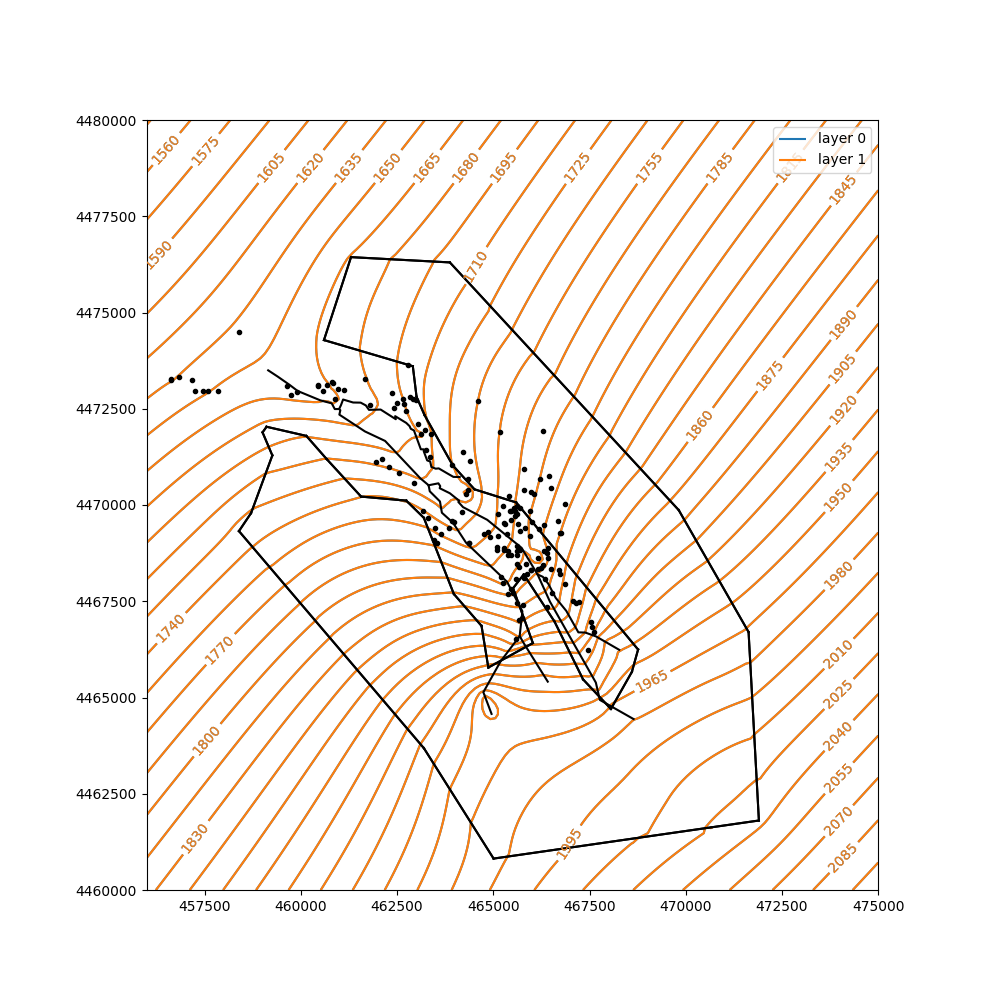

In [9]:
%matplotlib notebook
#from pylab import rcParams
#rcParams['figure.figsize'] = 15, 15
nelson_0, cabin_0, ml1 = model()
cntrs = ml1.contour(win=[456000, 475000, 4460000, 4480000], ngr=150, layers=[0,1], levels=50, color=['C0', 'C1'], 
           legend=True, labels=True) 

# Calibrate to Aquifer Test

## Setup Spotpy

In [10]:
class spotpy_setup(object):
    def __init__(self):
        self.params = [spotpy.parameter.Uniform('ktop',0.01,1.0,0.01,0.32),
                       spotpy.parameter.Uniform('kbot',0.001,1.0,0.005,0.0878),
                       spotpy.parameter.Uniform('ctime',0,50,1,4)
                       ]
    
    def parameters(self):
        return spotpy.parameter.generate(self.params)
    
    def simulation(self,vector):
        nelson_0, cabin_0, ml1 = model([vector[0],vector[1]],vector[2])
        nel, cab, ml2 = model([vector[0],vector[1]],vector[2],q=436)
        simulations = [((nelson_0 - nel)-22.86)+((cabin_0 - cab)-0.64)]
        return simulations

    def evaluation(self):
        observations=[0]
        return observations
    
    def objectivefunction(self,simulation,evaluation):
        objectivefunction= -spotpy.objectivefunctions.rmse(evaluation,simulation)      
        return objectivefunction
    


In [11]:
spotpy_setup=spotpy_setup()

## Calibrate

In [12]:
rep=20
results=[]
#sampler=spotpy.algorithms.mc(spotpy_setup,    dbname='RosenMC',    dbformat='csv')
#results.append(sampler.sample(rep))
sampler=spotpy.algorithms.lhs(spotpy_setup,   dbname='RosenLHS',   dbformat='csv')
results.append(sampler.sample(rep))


Starting the LHS algotrithm with 20 repetitions...
Creating LatinHyperCube Matrix
Number of elements, Number of equations: 249 , 634
.........................................................................................................................................................................................................................................................
solution complete
Number of elements, Number of equations: 249 , 634
.........................................................................................................................................................................................................................................................
solution complete
Initialize database...
1 of 20 (best like=-19.2503) est. time remaining: 00:04:28
Number of elements, Number of equations: 249 , 634
...................................................................................................................................................

.........................................................................................................................................................................................................................................................
solution complete
12 of 20 (best like=-9.97207) est. time remaining: 00:03:11
Number of elements, Number of equations: 249 , 634
.........................................................................................................................................................................................................................................................
solution complete
Number of elements, Number of equations: 249 , 634
.........................................................................................................................................................................................................................................................
solution complete
13 of 20 (best like=-9.97207) est.

## Read Calibrated Output

In [ ]:
for key,value in welldata.items():
    print(key,w[key].headinside())

In [ ]:
vec = [ 0.57427527, 0.07425003, 0.92957304]

nelson_1, cabin_1, ml = model([vec[0],vec[1]],vec[2],q=436)

win = [456000, 475000, 4460000, 4480000]
ngr = 170
layers = [0,1]

cntrs = ml.contour(win=win, ngr=ngr, layers=layers, levels=50, color=['C0', 'C1'], 
           legend=True, labels=True) 

print(nelson_1,cabin_1)

In [ ]:


Qx, _ = ml.disvecalongline(x, zeros_like(x))

# Draw output

In [ ]:
def getcntrdata(win, ngr, layers, ml):
    win = [456000, 475000, 4460000, 4480000]

    x1, x2, y1, y2 = win
    if np.isscalar(ngr):
        nx = ny = ngr
    else:
        nx, ny = ngr
    layers = np.atleast_1d(layers)
    xg = np.linspace(x1, x2, nx)
    yg = np.linspace(y1, y2, ny)
    h = ml.headgrid(xg, yg, layers)
    return xg,yg,h

xg,yg,h = getcntrdata(win,ngr,layers, ml)

In [ ]:
vec = [0.33559649, 0.07774039]

kaq=[0.33559649, 0.07774039]
ctime = 21.82622584
q=0
ml = ModelMaq(kaq=kaq,z=[1800, 1750, 1749, 1500], c=[ctime], npor=[0.20,0.20,0.2])

#p={}
#for key,value in sinkdata.items():
#    p[key] = CircAreaSink(ml, xc=value[1], yc=value[2], R=value[0], N=value[3], layer=0)

w={}
for key,value in welldata.items():
    w[key]= Well(ml, xw=value[0], yw=value[1], Qw=value[2], rw=0.1, layers=value[3]-1)


rf = Constant(ml, xr=458896, yr=4473651, hr=1651, layer=0) # specified head upper right corner
uf = Uflow(ml, slope=0.02, angle=140)
p1 = PolygonInhomMaq(ml, xy=xy1, kaq=[0.1, 0.1], z=[1900, 1600, 1595, 1200], c=[1], 
                     topboundary='conf', order=3, ndeg=2)


ls1 = HeadLineSinkString(ml, xy=lhob, hls=h_lhob, layers=0)
ls2 = HeadLineSinkString(ml, xy=main, hls=h_main, layers=0)
ls3 = HeadLineSinkString(ml, xy=maple, hls=h_maple, layers=0)
ls4 = HeadLineSinkString(ml, xy=spring, hls=h_spring, layers=0)
ls5 = HeadLineSinkString(ml, xy=umain, hls=h_umain, layers=0)
ls6 = HeadLineSinkString(ml, xy=llhob, hls=h_llhob, layers=0)

#spng = Well(ml, xw=464150, yw=4470725, Qw=0, rw=1.0, layers=[0])
#wpumper = Well(ml, xw=464382, yw=4469025, Qw=q, rw=0.1, layers=[1])
wpumper = Well(ml, xw=463344, yw=4471617, Qw=12000, rw=0.40, layers=[1])    
ml.solve()
ml.plot(win=win, orientation='both')
wpumper.plotcapzone(nt=50, zstart=1700, tmax=30000, orientation='both')
